# "ANALISA SENTIMEN ULASAN DARI ONLINE SHOP DI APLIKASI TOKOPEDIA DENGAN METODE NAIVE BAYES" #

- Nama  : Reza Aditya Prabowo 
- NIM   : A11.2022.14201
- Kelas : A11.4419
- Pembelajaran Mesin (Machine Learning)


## Ringkasan Dan Permasalahan Project 

### **Ringkasan**

Project ini bertujuan untuk menganalisis sentimen ulasan produk dari Tokopedia menggunakan model Naive Bayes. Dataset yang digunakan berisi ulasan yang telah diberi label sentimen. Sistem ini akan melatih dataset yang didapatkan di Github yang dimana nantinya diharapkan akan mengetahui mana ulasan yang positif, negatif, dan netral.

### **Permasalahan Project**

Permasalahan yang dialami pada saat project ini dilakukan yaitu : 

**Ketidakseimbangan Kelas Sentimen :**
- Dataset menunjukkan ketidakseimbangan yang signifikan antara kelas-kelas sentimen. Distribusi kelas adalah sebagai  adalah Sentimen Positif berjumlah 8.823 entri, Sentimen Netral berjumlah 691 entri, Sentimen Negatif berjumlah 485 entri. Yang dimana ketidakseimbangan kelas ini dapat menyebabkan model lebih cenderung untuk mengklasifikasikan ulasan ke dalam kelas yang dominan (positif) dan mengabaikan kelas minoritas (netral dan negatif). Penanganan ketidakseimbangan kelas, seperti menggunakan teknik oversampling (misalnya SMOTE) atau undersampling, diperlukan untuk memastikan model dapat mengklasifikasikan semua kategori dengan akurat.

**Kualitas Data :**
- Beberapa ulasan mungkin tidak mengandung informasi yang cukup untuk menentukan sentimen secara akurat. Misalnya, ulasan yang terlalu singkat atau ambigu bisa menyebabkan kesulitan dalam analisis sentimen.

**Evaluasi Model :**
- Mengingat adanya ketidakseimbangan kelas, pemilihan metrik evaluasi yang tepat sangat penting. Metrik seperti akurasi mungkin tidak mencerminkan performa model yang sebenarnya jika satu kelas lebih dominan.

## Tujuan Yang Ingin Dicapai 

Tujuan yang ingin dicapai pada project ini adalah sebagai berikut :

- Menganalisis Sentimen Ulasan Produk : Mengembangkan model pembelajaran mesin yang dapat digunakan untuk menganalisis sentimen ulasan produk Tokopedia ke dalam kategori seperti "positive", "neutral", dan "negative".

- Meningkatkan Pemahaman Tentang Ulasan Pelanggan : Menganalisis ulasan produk untuk mendapatkan wawasan tentang kepuasan dan ketidakpuasan pelanggan.

- Menyediakan Umpan Balik untuk Pengembang Produk : Memberikan umpan balik yang berguna bagi pengembang produk untuk meningkatkan fitur dan kualitas produk berdasarkan ulasan pelanggan.

## Model / Alur Penyelesaian 

Model yang digunakan dalam project adalah 



![alt text](<Bagan Gambar.png>)

## Penjelasan Dataset

Dataset yang digunakan dalam project ini adalah "product_review_tokopedia" dari Kaggle : https://www.kaggle.com/datasets/farhan999/tokopedia-product-reviews

Dataset ini berisi daftar ulasan pembelian produk dari Tokopedia dan digunakan untuk menganalisis sentimen ulasan produk. Dataset mencakup beberapa kolom penting sebagai berikut:

- text          : Ulasan produk dalam format teks.
- rating        : Penilaian atau skor yang diberikan untuk produk.
- category      : Kategori produk yang diulas.
- product_name  : Nama produk yang diulas.
- product_id    : ID unik untuk setiap produk.
- sold          : Jumlah unit produk yang telah terjual.
- shop_id       : ID toko atau penjual produk.
- product_url   : URL halaman produk di Tokopedia.
- sentiment     : Sentimen dalam dataset ini dilabelkan berdasarkan rating yang diberikan oleh pembeli pada ulasan produk.

Yang dimana sentimentnya dilabelkan seperti ini : 
- Sentimen Negatif : Diberikan pada ulasan dengan rating 1-2. Ulasan ini mencerminkan ketidakpuasan atau masalah dengan produk, seperti kualitas yang buruk, kesalahan produk, atau pelayanan yang tidak memadai.

Contoh Ulasan : "Lubang tidak presisi dan miring.", "Produk tidak sesuai deskripsi, sangat mengecewakan."

- Sentimen Netral : Diberikan pada ulasan dengan rating 3. Ulasan ini menunjukkan bahwa pengalaman dengan produk adalah rata-rata, tidak terlalu baik atau buruk, dan tidak mencerminkan kepuasan atau ketidakpuasan yang jelas.

Contoh Ulasan : "Pengiriman cepat, tetapi kualitas produk biasa saja.", "Produk sesuai dengan deskripsi, tidak ada yang istimewa."

- Sentimen Positif : Diberikan pada ulasan dengan rating 4-5. Ulasan ini mencerminkan kepuasan atau pengalaman yang sangat baik dengan produk, seperti kualitas yang tinggi, kepuasan layanan, atau fitur yang sangat sesuai dengan kebutuhan pembeli.

Contoh Ulasan : "Barang bagus, sesuai dengan pesanan dan kualitas sangat memuaskan.", "Pengiriman sangat cepat dan produk sesuai ekspektasi, sangat puas!"

Dataset ini digunakan untuk mengembangkan dan melatih model analisis sentimen guna memahami dan mengklasifikasikan sentimen dari ulasan produk. Analisis ini dapat memberikan wawasan tentang kepuasan pelanggan, performa produk, dan efektivitas penjualan.


## Penjelasan EDA

*Memuat Data*

Memuat library yang digunakan untuk menjalankan program dan menghubungkan dataset supaya terhubung kedalam kode

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'D:/File/Kuliah Udinus/Semester 4/Pembelajaran Mesin/UAS/labeled_product_review_tokopedia.csv'
df = pd.read_csv(file_path)

*Menampilkan Info Dataset*

Menampilkan Isi dari dataset, Coloumn dari dataset dan Deskripsi statistik dari dataset.

In [93]:
# Menampilkan 5 baris pertama dari dataset
print("5 baris pertama dari dataset:")
print(df.head())

# Menampilkan informasi umum mengenai dataset
print("\nInformasi umum mengenai dataset:")
print(df.info())

# Menampilkan deskripsi statistik dari dataset
print("\nDeskripsi statistik dari dataset:")
print(df.describe())

5 baris pertama dari dataset:
   Unnamed: 0                                             text  rating  \
0           1           Barang sesuai pesanan dan cepat sampai       5   
1           2                         Barang bagus harga murah       5   
2           3  Paket rapi...mantap....cepat....sampe ke tujuan       5   
3           4                       ya saya puas dgn barangnya       5   
4           5                     Responya luar biasa b mantap       5   

      category                                       product_name  product_id  \
0  pertukangan  Staples Dekorasi Staples Kayu + Refill 8mm - S...   418660637   
1  pertukangan  STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   416032545   
2  pertukangan  STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   416032545   
3  pertukangan  ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...   102279869   
4  pertukangan  Isi Refill Staples Jok Kulit Motor / Staple Gu...   190679689   

  sold  shop_id                       

*Distribusi label sentimen*

Menghitung jumlah data Sentimen yang berada di dataset

In [94]:
# Menampilkan distribusi sentimen
print("\nDistribusi sentimen:")
print(df['sentiment'].value_counts())


Distribusi sentimen:
sentiment
positive    8823
neutral      691
negative     485
Name: count, dtype: int64


*Statistik Teks*

Mencari jumlah kata unik pada dataset

In [95]:
# Panjang ulasan
df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe())

count    9999.000000
mean       55.174117
std        45.036770
min         6.000000
25%        32.000000
50%        43.000000
75%        63.000000
max      1076.000000
Name: text_length, dtype: float64


### *Visualisasi Data*

*Distribusi Sentimen*

Menggunakan library matplotlib dan seaborn untuk memvisualisasikan distribusi sentimen

C:\Users\USER\AppData\Local\Temp\ipykernel_4104\3302548537.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


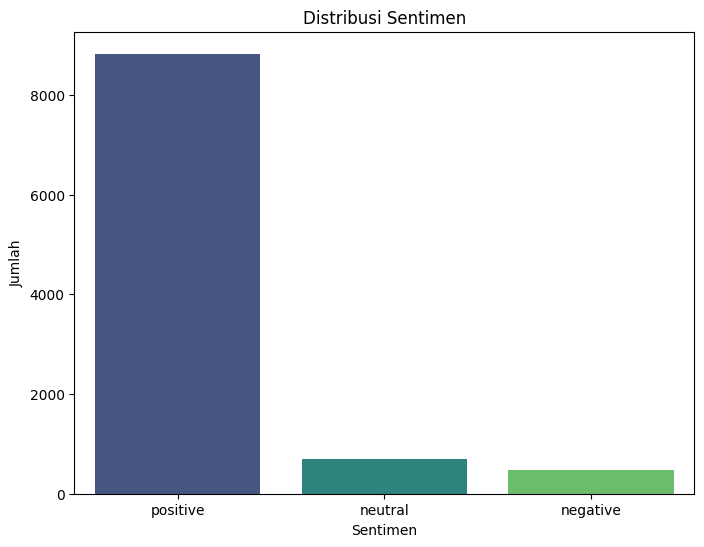

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi sentimen
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

*Menampilkan Panjang Teks yang diproses*

In [97]:
file_path = 'D:/File/Kuliah Udinus/Semester 4/Pembelajaran Mesin/UAS/Preprocessing/SaveData.csv'
df = pd.read_csv(file_path)

df['processed_text'] = df['processed_text'].astype(str)  # Pastikan semua nilai adalah string
df['text_length'] = df['processed_text'].apply(len)
print("\nDeskripsi statistik panjang teks yang telah diproses:")
print(df['text_length'].describe())


Deskripsi statistik panjang teks yang telah diproses:
count    9999.000000
mean       38.214821
std        29.513354
min         1.000000
25%        23.000000
50%        31.000000
75%        45.000000
max       602.000000
Name: text_length, dtype: float64


*Distribusi Panjang Ulasan*



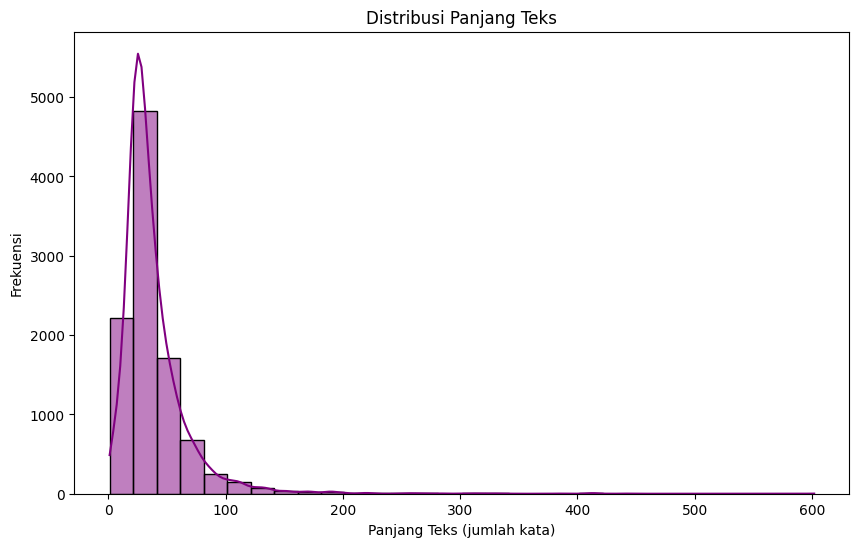

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True, color='purple')
plt.title('Distribusi Panjang Teks')
plt.xlabel('Panjang Teks (jumlah kata)')
plt.ylabel('Frekuensi')
plt.show()

*Menampilkan contoh Sentimen dan ulasan yang sesuai dengan sentimennya*

In [99]:
# Menampilkan contoh-contoh teks berdasarkan sentimen
print("\nContoh-contoh teks berdasarkan sentimen:")
for sentiment in df['sentiment'].unique():
    print(f"\nSentimen: {sentiment}")
    print(df[df['sentiment'] == sentiment]['processed_text'].head().tolist())


Contoh-contoh teks berdasarkan sentimen:

Sentimen: positive
['barang sesuai pesan cepat', 'barang bagus harga murah', 'paket rapimantapcepatsampe tuju', 'ya puas dgn barang', 'responya b mantap']

Sentimen: neutral
['sayang produk yg paking rapi buka n isi hambur saran klo kirim isi paku tembak lakban kemas paku gabung dgn yg cecer kualitas barang per bagus coba terima kasih', 'thanksssssssssssssss', 'barang bagus kualitas sesuai harga', 'ok sesuai denggan harga', 'barang terima kasih']

Sentimen: negative
['pesan gx sesuai dgn yg d gambar', 'kirim respon super cepat tpi barang sesuai gambar kuat tembus jok motor', 'barang yg kirim sesuai pesan', 'php bilang isi skripsi pas sen beda mubajir rp50000 isi ga cocok', 'barang jelek copot34 tmpat taro isi']


*Menampilkan 20 kata yang sering muncul pada seluruh teks*

In [100]:
# Menampilkan 20 kata yang paling sering muncul pada seluruh teks yang telah diproses
from collections import Counter
all_words = ' '.join(df['processed_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

print("\n20 kata yang paling sering muncul pada seluruh teks yang telah diproses:")
for word, freq in common_words:
    print(f"{word}: {freq}") 


20 kata yang paling sering muncul pada seluruh teks yang telah diproses:
barang: 4281
sesuai: 2976
cepat: 1743
bagus: 1658
terima: 1568
kirim: 1394
pesan: 869
gan: 811
kasih: 797
produk: 791
respon: 791
nya: 707
yg: 680
deskripsi: 670
seller: 643
harga: 620
mantap: 605
packing: 550
ok: 527
kualitas: 452


*Pembersihan Dan Prabaca*

*Proses Pembersihan*

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_csv('D:/File/Kuliah Udinus/Semester 4/Pembelajaran Mesin/UAS/Preprocessing/SaveData.csv')
# Menampilkan beberapa contoh ulasan setelah prabaca
print(df['processed_text'].head())

0          barang sesuai pesan cepat
1           barang bagus harga murah
2    paket rapimantapcepatsampe tuju
3                 ya puas dgn barang
4                  responya b mantap
Name: processed_text, dtype: object


*Analisa TF-IDF*

*Visualisasi Kata Kunci Teratas*

In [102]:
# Menangani nilai NaN dalam kolom 'processed_text'
# Mengganti nilai NaN dengan string kosong
df['processed_text'] = df['processed_text'].fillna('')

# Membuat TF-IDF Vectorizer dengan batasan fitur maksimal
tfidf_vectorizer = TfidfVectorizer(max_features=50)

# Mentransformasikan teks menjadi vektor TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

# Mendapatkan fitur kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

print("DataFrame TF-IDF:")
print(df_tfidf.head())

DataFrame TF-IDF:
   awet     bagus  banget    barang  beli     cepat  coba  deskripsi      dgn  \
0   0.0  0.000000     0.0  0.356334   0.0  0.525258   0.0        0.0  0.00000   
1   0.0  0.402753     0.0  0.270198   0.0  0.000000   0.0        0.0  0.00000   
2   0.0  0.000000     0.0  0.000000   0.0  0.000000   0.0        0.0  0.00000   
3   0.0  0.000000     0.0  0.295397   0.0  0.000000   0.0        0.0  0.68541   
4   0.0  0.000000     0.0  0.000000   0.0  0.000000   0.0        0.0  0.00000   

   fast  ...    sesuai  sukses  terima  terimakasih  thanks   tp  udah  warna  \
0   0.0  ...  0.419058     0.0     0.0          0.0     0.0  0.0   0.0    0.0   
1   0.0  ...  0.000000     0.0     0.0          0.0     0.0  0.0   0.0    0.0   
2   0.0  ...  0.000000     0.0     0.0          0.0     0.0  0.0   0.0    0.0   
3   0.0  ...  0.000000     0.0     0.0          0.0     0.0  0.0   0.0    0.0   
4   0.0  ...  0.000000     0.0     0.0          0.0     0.0  0.0   0.0    0.0   

        

*Frekuensi Kata Kunci*

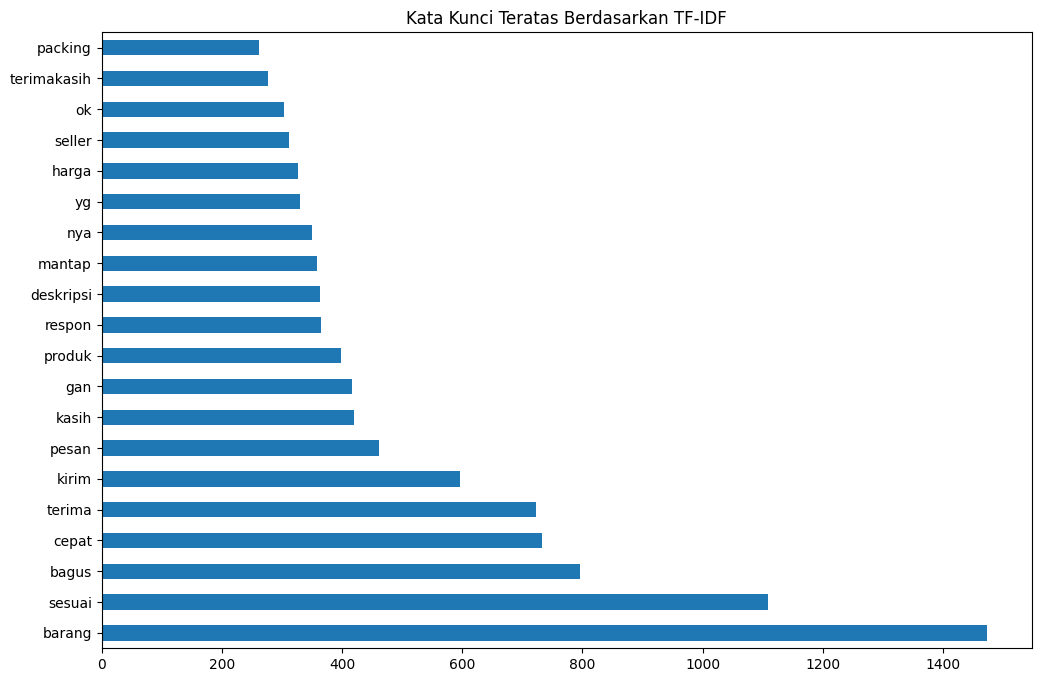

In [103]:
# Menampilkan kata kunci teratas
top_keywords = df_tfidf.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 8))
top_keywords.plot(kind='barh')
plt.title('Kata Kunci Teratas Berdasarkan TF-IDF')
plt.show()

*Persiapan Data Untuk Model*

*Pembagian Data*

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df['processed_text']
y = df['sentiment']

# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.5, random_state=42)


*Imbalansi Data Dan Resampling*

*OverSampling Dengan SMOTE*

In [105]:
from imblearn.over_sampling import SMOTE

# Mengubah teks menjadi TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

## Proses Features Dataset

Pada bagian ini melibatkan transformasi data mentah menjadi fitur yang dapat digunakan oleh model machine learning. Berikut adalah langkah-langkah yang diambil untuk memproses fitur data, yang meliputi pembersihan teks, tokenisasi, penghapusan stopwords, stemming, dan transformasi teks menggunakan TF-IDF:

*Mengimpor Library Yang nanti dipakai*

In [106]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB

# Mengunduh resource jika belum ada
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

*Memuat dan Membersihkan Stopwords*

In [107]:
# Fungsi untuk memuat stopwords dari file
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = set(file.read().splitlines())
    return stopwords

# Path ke file stopwords
stop_words_path = 'D:/File/Kuliah Udinus/Semester 4/Pembelajaran Mesin/UAS/Preprocessing/stopwords-id.txt'  # Ganti dengan path file stopwords Anda
stop_words = load_stopwords(stop_words_path)

*Membuat Stemmer Bahasa Indonesia*

In [108]:
# Membuat stemmer Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

*Fungsi Untuk Preprocessing Text*

In [109]:
# Fungsi untuk preprocessing teks
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenisasi teks
    tokens = word_tokenize(text)
    
    # Menghapus stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)


*Memuat dan Memproses dataset*

In [110]:
# Path ke file CSV dan Memuat file CSV
file_path = 'D:/File/Kuliah Udinus/Semester 4/Pembelajaran Mesin/UAS/labeled_product_review_tokopedia.csv'  # Ganti dengan path file CSV Anda
df = pd.read_csv(file_path)

# Asumsi kolom teks bernama 'text'
df['processed_text'] = df['text'].apply(preprocess_text)

*Menyimpan Dataset yang telah diproses*

In [111]:
# Menyimpan dataset yang telah diproses ke file CSV baru
output_path = 'D:/File/Kuliah Udinus/Semester 4/Pembelajaran Mesin/UAS/Preprocessing/SaveData.csv'  # Ganti dengan path dan nama file untuk menyimpan file CSV yang telah diproses
df.to_csv(output_path, index=False)

print("Preprocessing selesai. Dataset yang telah diproses disimpan di:", output_path)

Preprocessing selesai. Dataset yang telah diproses disimpan di: D:/File/Kuliah Udinus/Semester 4/Pembelajaran Mesin/UAS/Preprocessing/SaveData.csv


*Memuat Dataset yang telah diproses*

In [112]:
# Load dataset dari preprocessed CSV
df = pd.read_csv(output_path)

# Asumsi kolom teks yang telah diproses bernama 'processed_text' dan kolom sentimen bernama 'sentiment'
X = df['processed_text'].astype(str).tolist()
y = df['sentiment'].tolist()

*Encoding Label Sentimen*

In [113]:
# Encode label sentimen
le = LabelEncoder()
y_encoded = le.fit_transform(y)

*Membagi Data Menjadi Training dan Testing Sets*

In [119]:
# Split data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.9, random_state=42)

Membuat dan Mentransformasi TF-IDF Vectorizer

In [120]:
# Membuat TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform teks menjadi TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

*Mengaplikasikan SMOTE untuk Oversampling*

In [121]:
# Apply SMOTE untuk oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

*Membuat dan Melatih Naive Bayes Classifier*

In [122]:
# Membuat Naive Bayes Classifier
nb_classifier = GaussianNB()

# Melatih classifier dengan data resampled
nb_classifier.fit(X_train_resampled.toarray(), y_train_resampled)


GaussianNB()

*Evaluasi Model*

In [123]:
# Evaluasi model
y_pred_nb = nb_classifier.predict(X_test_tfidf.toarray())
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, target_names=le.classes_)

print("Accuracy (Naive Bayes):", accuracy_nb)
print("Classification Report (Naive Bayes):")
print(report_nb)

Accuracy (Naive Bayes): 0.5914444444444444
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

    negative       0.11      0.34      0.16       438
     neutral       0.08      0.25      0.12       636
    positive       0.90      0.63      0.74      7926

    accuracy                           0.59      9000
   macro avg       0.36      0.41      0.34      9000
weighted avg       0.80      0.59      0.67      9000



*Prediksi Sentimen untuk Teks Baru*

In [124]:
# Contoh teks baru untuk diprediksi
new_texts = ['Pesanan gx sesuai dgn yg d gambar', 'Pengiriman Cepat, packing aman tapi Isi staplesnya pada karatan semua, beli 2 box', 'Produknya bagus, berkualitas, dan berfungsi dg baik']

# Transform teks baru menjadi TF-IDF vectors (hanya transform, tidak fitting lagi)
new_texts_tfidf = tfidf_vectorizer.transform(new_texts)

# Prediksi menggunakan classifier yang telah dilatih
predicted_labels_nb = nb_classifier.predict(new_texts_tfidf.toarray())

# Decode label yang diprediksi
predicted_labels_decoded = le.inverse_transform(predicted_labels_nb)

# Print label yang diprediksi dengan output terperinci
print("\nPredicted Sentiments for New Texts (Naive Bayes):")
for text, sentiment in zip(new_texts, predicted_labels_decoded):
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")


Predicted Sentiments for New Texts (Naive Bayes):
Text: Pesanan gx sesuai dgn yg d gambar
Predicted Sentiment: negative

Text: Pengiriman Cepat, packing aman tapi Isi staplesnya pada karatan semua, beli 2 box
Predicted Sentiment: neutral

Text: Produknya bagus, berkualitas, dan berfungsi dg baik
Predicted Sentiment: positive



## Proses Learning / Modeling 

*Mengimpor Library yang Dibutuhkan*

In [125]:
# Mengimpor library yang dibutuhkan
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB

*Memuat Dataset yang Telah Diproses*

In [126]:
# Load dataset dari preprocessed CSV
file_path = 'D:/File/Kuliah Udinus/Semester 4/Pembelajaran Mesin/UAS/Preprocessing/SaveData.csv'
df = pd.read_csv(file_path)

# Asumsi kolom teks yang telah diproses bernama 'processed_text' dan kolom sentimen bernama 'sentiment'
X = df['processed_text'].astype(str).tolist()
y = df['sentiment'].tolist()

*Encoding Label Sentimen*

In [127]:
# Encode label sentimen
le = LabelEncoder()
y_encoded = le.fit_transform(y)

*Membagi Data Menjadi Training dan Testing Sets*

In [133]:
# Split data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.9, random_state=42)

*Membuat dan Mentransformasi TF-IDF Vectorizer*

In [134]:
# Membuat TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform teks menjadi TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

*Mengaplikasikan SMOTE untuk Oversampling*

In [135]:
# Apply SMOTE untuk oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

*Membuat dan Melatih Naive Bayes Classifier*

In [136]:
# Membuat Naive Bayes Classifier
nb_classifier = GaussianNB()

# Melatih classifier dengan data resampled
nb_classifier.fit(X_train_resampled.toarray(), y_train_resampled)

GaussianNB()

*Evaluasi Model*

In [137]:
# Evaluasi model
y_pred_nb = nb_classifier.predict(X_test_tfidf.toarray())
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, target_names=le.classes_)

print("Accuracy (Naive Bayes):", accuracy_nb)
print("Classification Report (Naive Bayes):")
print(report_nb)

Accuracy (Naive Bayes): 0.5914444444444444
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

    negative       0.11      0.34      0.16       438
     neutral       0.08      0.25      0.12       636
    positive       0.90      0.63      0.74      7926

    accuracy                           0.59      9000
   macro avg       0.36      0.41      0.34      9000
weighted avg       0.80      0.59      0.67      9000



*Prediksi Sentimen untuk Teks Baru*

In [138]:
# Contoh teks baru untuk diprediksi
new_texts = ['Pesanan gx sesuai dgn yg d gambar', 'Pengiriman Cepat, packing aman tapi Isi staplesnya pada karatan semua, beli 2 box', 'Produknya bagus, berkualitas, dan berfungsi dg baik']

# Transform teks baru menjadi TF-IDF vectors (hanya transform, tidak fitting lagi)
new_texts_tfidf = tfidf_vectorizer.transform(new_texts)

# Prediksi menggunakan classifier yang telah dilatih
predicted_labels_nb = nb_classifier.predict(new_texts_tfidf.toarray())

# Decode label yang diprediksi
predicted_labels_decoded = le.inverse_transform(predicted_labels_nb)

# Print label yang diprediksi dengan output terperinci
print("\nPredicted Sentiments for New Texts (Naive Bayes):")
for text, sentiment in zip(new_texts, predicted_labels_decoded):
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")


Predicted Sentiments for New Texts (Naive Bayes):
Text: Pesanan gx sesuai dgn yg d gambar
Predicted Sentiment: negative

Text: Pengiriman Cepat, packing aman tapi Isi staplesnya pada karatan semua, beli 2 box
Predicted Sentiment: neutral

Text: Produknya bagus, berkualitas, dan berfungsi dg baik
Predicted Sentiment: positive



## Performa Model

*Melakukan Load Library*

In [149]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB  # Menggunakan MultinomialNB untuk multi-kelas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

*Melakukan Load Dataset*

In [150]:
# Memuat dataset dari CSV yang telah diproses
file_path ='D:/File/Kuliah Udinus/Semester 4/Pembelajaran Mesin/UAS/Preprocessing/SaveData.csv'
df = pd.read_csv(file_path)

*Mengambil Kolom teks Sentimen*

In [151]:
# Mengambil kolom teks yang telah diproses dan kolom sentimen
X = df['processed_text'].astype(str).tolist()
y = df['sentiment'].tolist()

*Melakukan Enkode label sentimen Menjadi bentuk Numerik*

In [152]:
# Mengkodekan label sentimen menjadi numerik
le = LabelEncoder()
y_encoded = le.fit_transform(y)

*Melakukan Pengujian Kepada Data*

In [153]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.9, random_state=42)

*Melakukan Vectorisasi menggunakan TF-IDF*

In [154]:
# Membuat dan menerapkan TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

*Menerapkan SMOTE*

In [155]:
# Menerapkan SMOTE untuk oversampling data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

*Melatih Model dengan NaiveBayes*

In [156]:
# Membuat dan melatih model Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_resampled.toarray(), y_train_resampled)

GaussianNB()

*Melakukan Prediksi Menggunakan Model Yang Dilatih*

In [157]:
# Melakukan prediksi dengan model yang telah dilatih
y_pred_nb = nb_classifier.predict(X_test_tfidf.toarray())

*Menghitung Akurasi dari Model*

In [158]:
# Menghitung akurasi model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Akurasi (Naive Bayes):", accuracy_nb)

Akurasi (Naive Bayes): 0.5914444444444444


*Menampilkan Hasil Laporan Klasifikasi Naive Bayesnya*

Setelah melatih model Naive Bayes dengan dataset yang telah diproses, lalu mengevaluasi performa model menggunakan beberapa metrik evaluasi, termasuk akurasi, laporan klasifikasi, matriks kebingungan, kurva ROC, dan kurva Precision-Recall. yang nantinya akan diterapkan pada analisis sentimen ulasan produk di aplikasi Tokopedia.

In [159]:
# Menampilkan laporan klasifikasi
report_nb = classification_report(y_test, y_pred_nb, target_names=le.classes_)
print("Laporan Klasifikasi (Naive Bayes):")
print(report_nb)

Laporan Klasifikasi (Naive Bayes):
              precision    recall  f1-score   support

    negative       0.11      0.34      0.16       438
     neutral       0.08      0.25      0.12       636
    positive       0.90      0.63      0.74      7926

    accuracy                           0.59      9000
   macro avg       0.36      0.41      0.34      9000
weighted avg       0.80      0.59      0.67      9000



*Matriks Kebingungan*

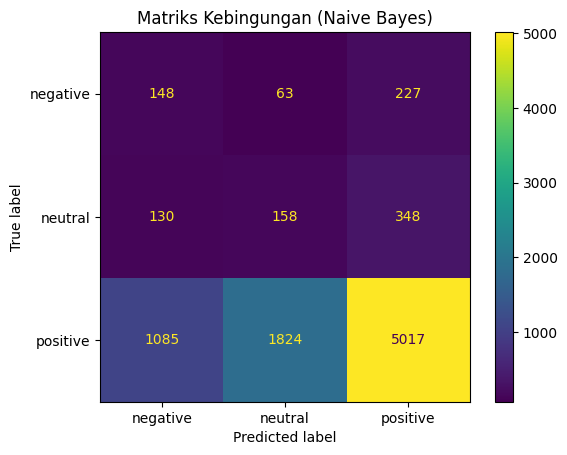

In [160]:
# Matriks Kebingungan
conf_matrix = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
disp.plot()
plt.title("Matriks Kebingungan (Naive Bayes)")
plt.show()

*Kurva Precision-Recall*

In [161]:
# Kurva Precision-Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

*Menghitung Precision-Recall dan Plot Kurvanya*

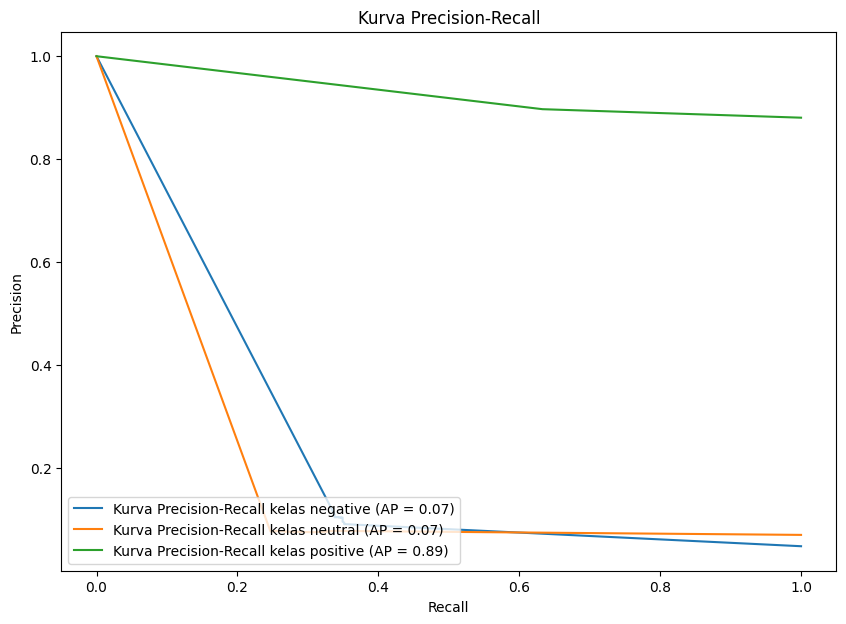

In [162]:
# Menghitung Precision-Recall dan plot kurva
plt.figure(figsize=(10, 7))
for i in range(len(le.classes_)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Kurva Precision-Recall kelas {le.classes_[i]} (AP = {average_precision_score(y_test_bin[:, i], y_pred_proba[:, i]):.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Kurva Precision-Recall')
plt.legend(loc="lower left")
plt.show()

*Memasukkan contoh Teks Prediksinya*

In [163]:
# Contoh teks baru untuk prediksi
new_texts = [
    'Pesanan gx sesuai dgn yg d gambar',
    'Pengiriman Cepat, packing aman tapi Isi staplesnya pada karatan semua, beli 2 box',
    'Produknya bagus, berkualitas, dan berfungsi dg baik',
]

*Mengubah teks Menjadi TF-IDF*

In [164]:
# Mengubah teks baru menjadi TF-IDF vectors (hanya transformasi, tanpa fitting)
new_texts_tfidf = tfidf_vectorizer.transform(new_texts)

*Melakukan prediksi dengan data yang sudah dilatih*

In [165]:
# Melakukan prediksi menggunakan model yang telah dilatih
predicted_labels_nb = nb_classifier.predict(new_texts_tfidf.toarray())

*Mengkode label prediksi menjadi sentimen*

In [166]:
# Mendecode label prediksi menjadi sentimen yang dapat dipahami
predicted_labels_decoded = le.inverse_transform(predicted_labels_nb)

*Menampilkan Hasil Prediksinya*

In [167]:
# Menampilkan hasil prediksi untuk teks baru
print("\nPrediksi Sentimen untuk Teks Baru (Naive Bayes):")
for text, sentiment in zip(new_texts, predicted_labels_decoded):
    print(f"Teks: {text}\nPrediksi Sentimen: {sentiment}\n")


Prediksi Sentimen untuk Teks Baru (Naive Bayes):
Teks: Pesanan gx sesuai dgn yg d gambar
Prediksi Sentimen: negative

Teks: Pengiriman Cepat, packing aman tapi Isi staplesnya pada karatan semua, beli 2 box
Prediksi Sentimen: neutral

Teks: Produknya bagus, berkualitas, dan berfungsi dg baik
Prediksi Sentimen: positive



## Diskusi Hasil dan Kesimpulan



### Diskusi Hasil 
Model Naive Bayes yang telah dilatih pada dataset ulasan produk dari Tokopedia menunjukkan hasil yang signifikan dalam mengklasifikasikan sentimen ulasan ke dalam kategori positif, netral, dan negatif. Namun, beberapa aspek penting perlu dibahas lebih lanjut:

1. Ketidakseimbangan Kelas Sentimen yang dimana dataset menunjukkan ketidakseimbangan yang signifikan antara kelas-kelas sentimen dengan kelas positif mendominasi dataset. Hal ini dapat menyebabkan bias dalam model, di mana model lebih cenderung mengklasifikasikan ulasan ke dalam kelas positif. Penggunaan teknik oversampling seperti SMOTE membantu dalam mengurangi efek ketidakseimbangan ini.

2. Kualitas Data, Beberapa ulasan yang terlalu singkat atau ambigu dapat mempengaruhi akurasi prediksi sentimen. Preprocessing teks yang menyeluruh sangat penting untuk memastikan bahwa ulasan yang masuk ke dalam model memiliki kualitas yang memadai untuk dianalisis.

3. TF-IDF digunakan untuk mengubah teks ulasan menjadi representasi numerik, yang memungkinkan model untuk menangkap informasi penting dari data teks. Penggunaan SMOTE untuk menangani ketidakseimbangan kelas berhasil meningkatkan kinerja model dengan memastikan bahwa model tidak bias terhadap kelas mayoritas.
Kelemahan dan Tantangan:

4. Metrik Evaluasi, Akurasi model mencapai nilai yang tinggi namun mengingat adanya ketidakseimbangan kelas, metrik lain seperti precision, recall, dan F1-score memberikan gambaran yang lebih lengkap tentang performa model. Evaluasi dengan matriks kebingungan menunjukkan kemampuan model dalam mengklasifikasikan setiap kelas secara spesifik.

5. Model Naive Bayes memiliki asumsi independensi yang mungkin tidak selalu valid dalam data teks, yang dapat mempengaruhi akurasi model. Kinerja model dapat ditingkatkan lebih lanjut dengan mencoba algoritma lain seperti SVM atau menggunakan teknik ensemble learning.


### Kesimpulan 
Proyek ini menunjukkan bahwa model Naive Bayes, dikombinasikan dengan teknik preprocessing teks yang tepat, dapat digunakan untuk menganalisa klasifikasi sentimen ulasan produk dengan akurasi yang memadai. Meskipun ada ruang untuk perbaikan, hasil yang diperoleh memberikan dasar yang kuat untuk analisis sentimen lebih lanjut dan implementasi dalam sistem rekomendasi produk.